In [5]:
from BaroSphere import BaroSphere
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy 


plt.style.use('dark_background')
B=BaroSphere(
    ntrunc=106,
    dt=450,
    damping_order=4,
    efold=6*3600,
    nlat=160
)
print(B.nlat,B.nlon,B.ntrunc)

160 320 106


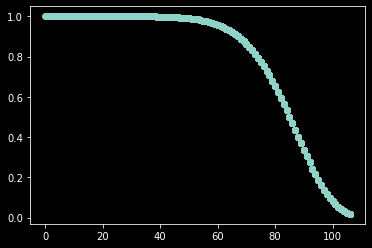

In [6]:
plt.plot(B.indxn,np.power(B.hyperdiff_fact,1*24*3600/B.dt),'o')


In [7]:
#total number of steps to take
Nsteps = int(20*24*3600/B.dt)
#how often to take snapshots
dN_snap = int(6*3600/B.dt)
#total number of snapshots
Nsnaps = int(Nsteps/dN_snap)

print(Nsteps,dN_snap,Nsnaps)

#first time step 
vrt0 = B.vrtg_unstable_jet(m=3.5,A=2.5e-4)# + 1e-6*np.random.randn(B.nlat,B.nlon)
vrt1 = vrt0 + B.dt * B.vrt_time_tendency(vrt0)

#add these into B
B.vrtg_m1 = vrt0
B.vrtg = vrt0

#initialize the snapshots
vrt = np.zeros([Nsnaps+1,B.nlat,B.nlon])
vrt[0] = vrt0
ksnap = 1

#main time loop
for i in range(1,Nsteps+1):
    B.RA_leapfrog()
    if i%dN_snap == 0:
        print(i,ksnap,np.max(B.vrtg))
        vrt[ksnap] = np.copy(B.vrtg)
        ksnap += 1

3840 48 80


48 1 0.00012156758
96 2 0.00011962112
144 3 0.00012565803
192 4 0.00013422633
240 5 0.0001345713
288 6 0.00012989737
336 7 0.00012266714
384 8 0.000116803305
432 9 0.00010846819
480 10 0.000113030255
528 11 0.000114999
576 12 0.0001173466
624 13 0.00011487468
672 14 0.0001115527
720 15 0.000106426065
768 16 9.8424855e-05
816 17 9.92897e-05
864 18 0.000101113474
912 19 0.00010061414
960 20 0.000101648686
1008 21 0.00010400308
1056 22 0.00010308829
1104 23 0.0001002049
1152 24 0.000105083134
1200 25 0.00011345143
1248 26 0.000112824964
1296 27 0.00011007412
1344 28 9.797339e-05
1392 29 9.589364e-05
1440 30 9.381166e-05
1488 31 9.3467665e-05
1536 32 9.60857e-05
1584 33 0.00010053186
1632 34 9.953591e-05
1680 35 9.5814954e-05
1728 36 9.771127e-05
1776 37 9.986869e-05
1824 38 9.587291e-05
1872 39 9.174997e-05
1920 40 9.161108e-05
1968 41 9.158999e-05
2016 42 8.806605e-05
2064 43 8.582508e-05
2112 44 8.883433e-05
2160 45 8.688312e-05
2208 46 8.155768e-05
2256 47 8.0444195e-05
2304 48 7.96106

<Figure size 432x288 with 0 Axes>

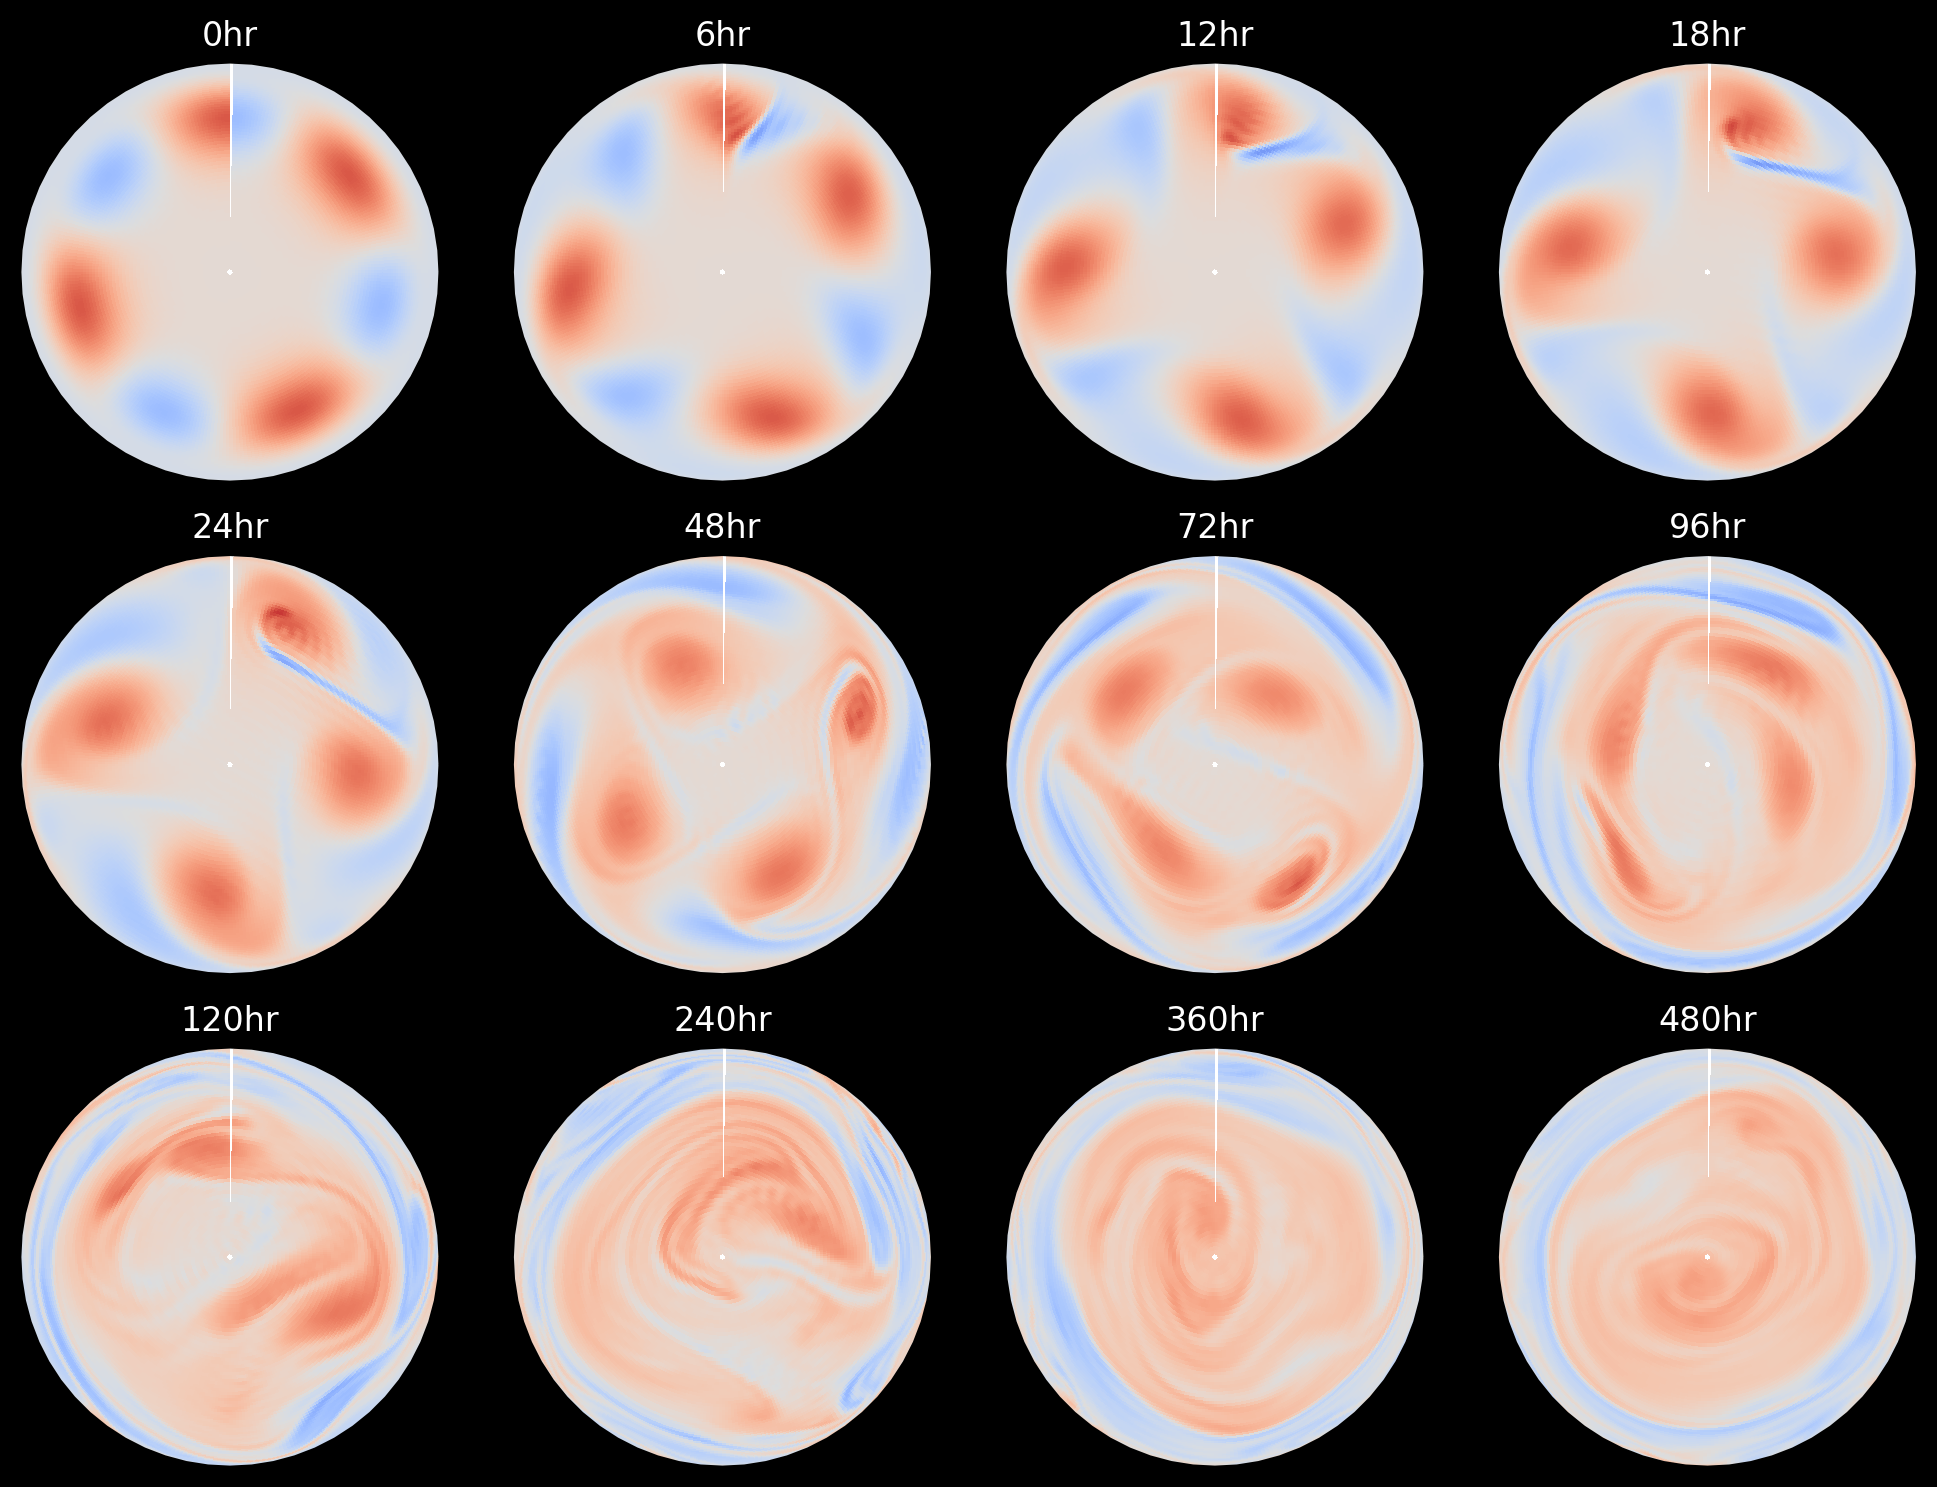

In [8]:
plt.clf()
plt.figure(0,figsize=(10,10),dpi=200)
lim=5e-5
il=np.hstack([np.arange(0,4),np.arange(4,17,4),np.arange(20,81,20)])
crs = cartopy.crs.RotatedPole(pole_longitude=0, pole_latitude=0)
nx=2; ny=2
dC=0.02e-4
levs=np.hstack([np.arange(-2e-4,-dC,dC),np.arange(dC,2e-4,dC)])
for i in range(0,12):
    ax=plt.subplot(4,4,i+1,projection=cartopy.crs.Orthographic(0, 
    -0))
         
    ax.pcolormesh(B.lons1,B.lats1,vrt[il[i]],
    vmin=-1.5e-4,vmax=1.5e-4,cmap=plt.cm.coolwarm,
#    levels=levs,
    transform=crs)
    plt.title(str(il[i]*6)+'hr')
    
    # u,v=B.x.getuv(B.x.grdtospec(vrt[il[i]],B.ntrunc),0*B.indxn)
    
    # ax.quiver(B.lons[::ny,::nx],B.lats[::ny,::nx],u[::ny,::nx],v[::ny,::nx],
    # color='k',
    # #vmin=-0.5e-4,vmax=0.5e-4,cmap=plt.cm.coolwarm,
    # transform=crs)    

plt.tight_layout()    
#plt.savefig('wave24.png')


IndexError: index 81 is out of bounds for axis 0 with size 81

<Figure size 432x288 with 0 Axes>

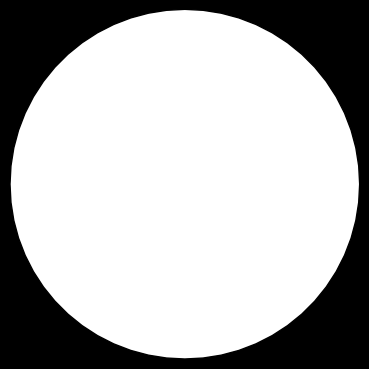

In [12]:
for i in range(0,80):
    plt.clf()
    plt.figure(0,figsize=(4,4),dpi=100)
    lim=5e-5
    il=np.hstack([np.arange(0,4),np.arange(4,17,4),np.arange(20,81,20)])
    crs = cartopy.crs.RotatedPole(pole_longitude=0, pole_latitude=0)
    nx=2; ny=2
    dC=0.02e-4
    levs=np.hstack([np.arange(-2e-4,-dC,dC),np.arange(dC,2e-4,dC)])
#    for i in range(0,12):
#        ax=plt.subplot(4,4,i+1,projection=cartopy.crs.Orthographic(0, 
#        -0))
    ax = plt.subplot(1,1,1,projection=cartopy.crs.Orthographic(0,0))            
    ax.pcolormesh(B.lons1,B.lats1,vrt[i],
        vmin=-1.5e-4,vmax=1.5e-4,cmap=plt.cm.coolwarm,
    #    levels=levs,
        transform=crs)
    plt.title(str(i*6)+'hr')
        
        # u,v=B.x.getuv(B.x.grdtospec(vrt[il[i]],B.ntrunc),0*B.indxn)
        
        # ax.quiver(B.lons[::ny,::nx],B.lats[::ny,::nx],u[::ny,::nx],v[::ny,::nx],
        # color='k',
        # #vmin=-0.5e-4,vmax=0.5e-4,cmap=plt.cm.coolwarm,
        # transform=crs)    

    plt.tight_layout()    
    plt.savefig(f'W{str(i).zfill(4)}.png')
